In [ ]:
import pandas as pd
import numpy as np
import zipfile 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
with zipfile.ZipFile("/Users/esteb/BI/ST.zip", 'r') as zip:
    zip.extractall("ST")

In [5]:
dataset_dir = "ST/Shark Tank US dataset.csv"

In [6]:
df = pd.read_csv(dataset_dir)
df.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,...,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
1,1,MrTod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
2,1,Wispots,1,3,9-Aug-09,5-Feb-10,9-Aug-09,Business Services,Wispots - Consumer Services,http://www.wispots.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
3,1,CollegeFoxesPackingBoxes,1,4,9-Aug-09,5-Feb-10,9-Aug-09,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,http://collegehunkshaulingjunk.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
4,1,IonicEar,1,5,9-Aug-09,5-Feb-10,9-Aug-09,Technology/Software,Ionic Ear - Novelties,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN


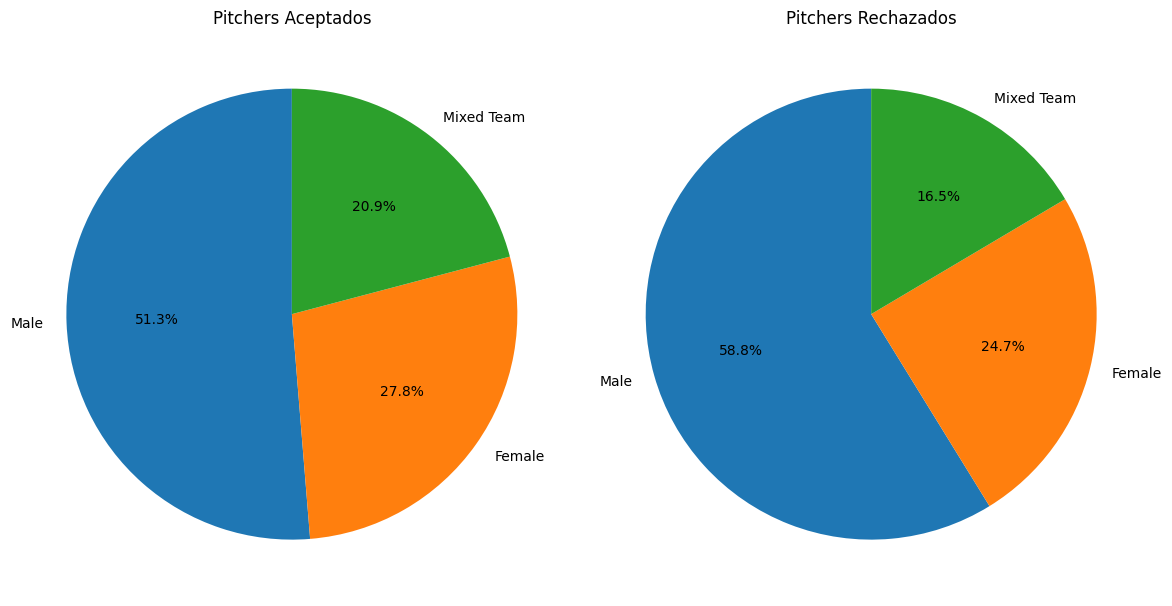

In [6]:
# Filtrar empresas aceptadas y rechazadas
accepted = df[df['Got Deal'] == 1]
rejected = df[df['Got Deal'] == 0]

accepted_pie = accepted['Pitchers Gender'].value_counts(normalize=True) * 100
rejected_pie = rejected['Pitchers Gender'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(accepted_pie, labels=accepted_pie.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Pitchers Aceptados')

axs[1].pie(rejected_pie, labels=rejected_pie.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Pitchers Rechazados')

plt.tight_layout()
plt.show()

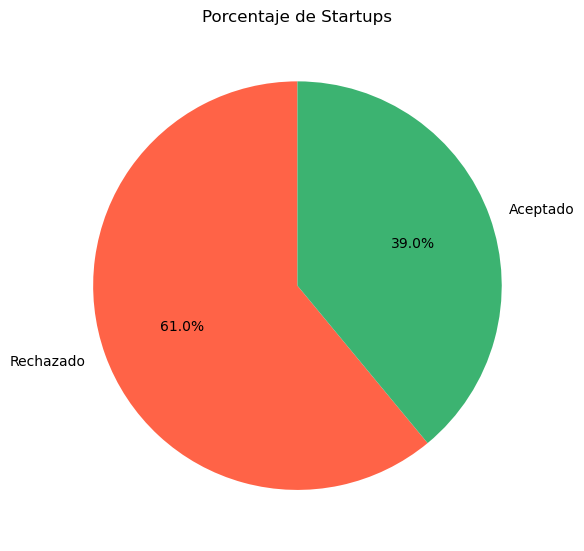

In [35]:
df['Got Deal'] = pd.to_numeric(df['Got Deal'], errors='coerce')

# Calcular porcentajes
deal_counts = df['Got Deal'].value_counts(normalize=True) * 100
deal_counts.index = ['Rechazado', 'Aceptado'] if 0 in deal_counts.index else ['Aceptado']

plt.figure(figsize=(6, 6))
plt.pie(deal_counts, labels=deal_counts.index, autopct='%1.1f%%', startangle=90, colors=['tomato', 'mediumseagreen'])
plt.title('Porcentaje de Startups')
plt.tight_layout()
plt.show()

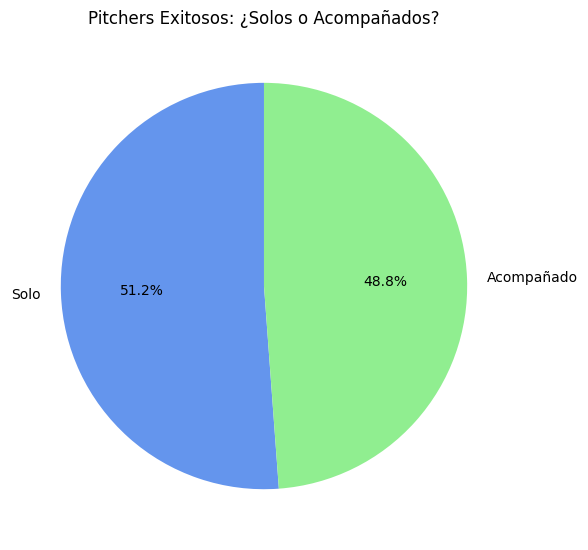

In [45]:
# Asegurar que las columnas sean numéricas
df['Got Deal'] = pd.to_numeric(df['Got Deal'], errors='coerce')
df['Multiple Entrepreneurs'] = pd.to_numeric(df['Multiple Entrepreneurs'], errors='coerce')

# Filtrar solo los pitchers que obtuvieron inversión
exitosos = df[df['Got Deal'] == 1]

# Contar cuántos fueron solos o acompañados
conteo = exitosos['Multiple Entrepreneurs'].value_counts()

# Renombrar índices para legibilidad
conteo.index = ['Solo', 'Acompañado']

# Calcular porcentaje
porcentaje = (conteo / conteo.sum()) * 100

plt.figure(figsize=(6, 6))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', startangle=90, colors=['cornflowerblue', 'lightgreen'])
plt.title('Pitchers Exitosos: ¿Solos o Acompañados?')
plt.tight_layout()
plt.show()

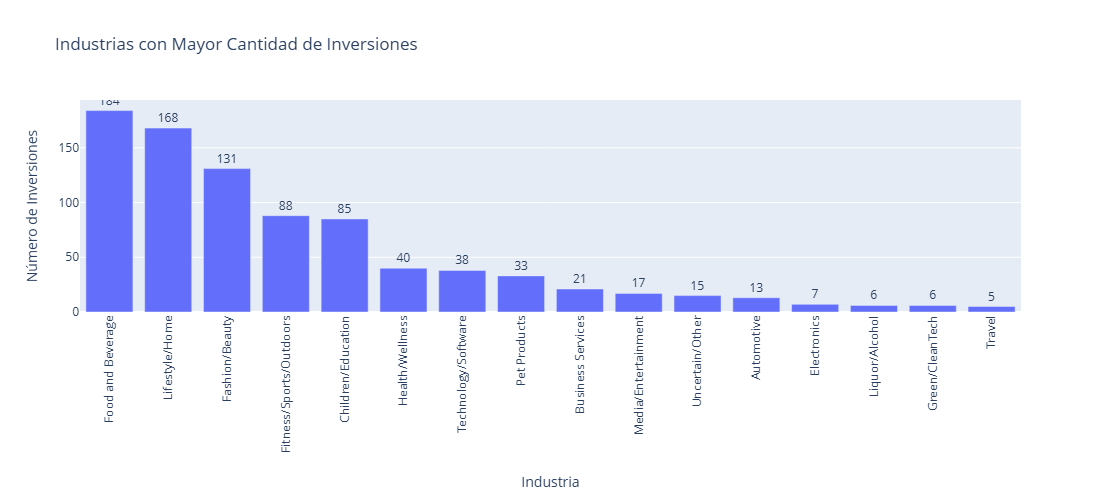

In [29]:
# Filtrar los que obtuvieron inversión
accepted = df[df['Got Deal'] == 1]

# Contar las industrias con más inversiones
industry_investment = accepted['Industry'].value_counts().reset_index()
industry_investment.columns = ['Industry', 'Número de Inversiones']

fig = px.bar(
    industry_investment,
    x='Industry',
    y='Número de Inversiones',
    text='Número de Inversiones',
    title='Industrias con Mayor Cantidad de Inversiones',
    labels={'Industry': 'Industria'},
)

fig.update_traces(textposition='outside')
fig.update_layout(width=900, height=500, xaxis_tickangle=-90)
fig.show()

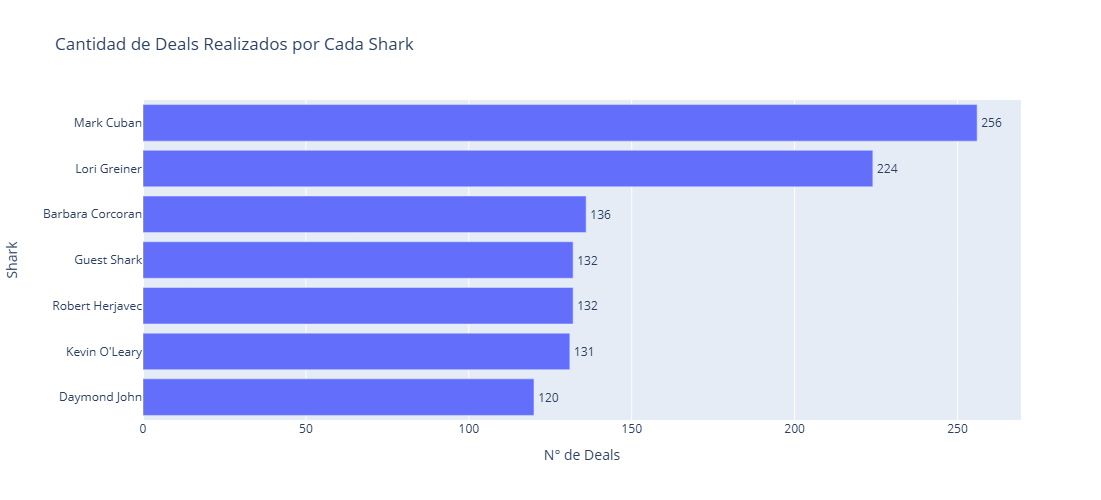

In [14]:
# Lista de columnas de inversión por shark
shark_columns = [
    'Barbara Corcoran Investment Amount',
    'Mark Cuban Investment Amount',
    'Lori Greiner Investment Amount',
    'Robert Herjavec Investment Amount',
    'Daymond John Investment Amount',
    'Kevin O Leary Investment Amount',
    'Guest Investment Amount'
]

# Contar cuántos deals hizo cada shark (cuando el monto es > 0)
deals_por_shark = (df[shark_columns] > 0).sum()

# Renombrar índices para visualización
deals_por_shark.index = [
    'Barbara Corcoran', 'Mark Cuban', 'Lori Greiner',
    'Robert Herjavec', 'Daymond John', "Kevin O'Leary", 'Guest Shark'
]

# Convertir a DataFrame
deals_df = deals_por_shark.reset_index()
deals_df.columns = ['Shark', 'Cantidad de Deals']

fig = px.bar(
    deals_df.sort_values('Cantidad de Deals'),
    x='Cantidad de Deals',
    y='Shark',
    orientation='h',
    text='Cantidad de Deals',
    title='Cantidad de Deals Realizados por Cada Shark',
    labels={'Cantidad de Deals': 'N° de Deals'},
)

fig.update_traces(textposition='outside', hovertemplate='%{y}: %{x} deals')
fig.update_layout(width=900, height=500)
fig.show()

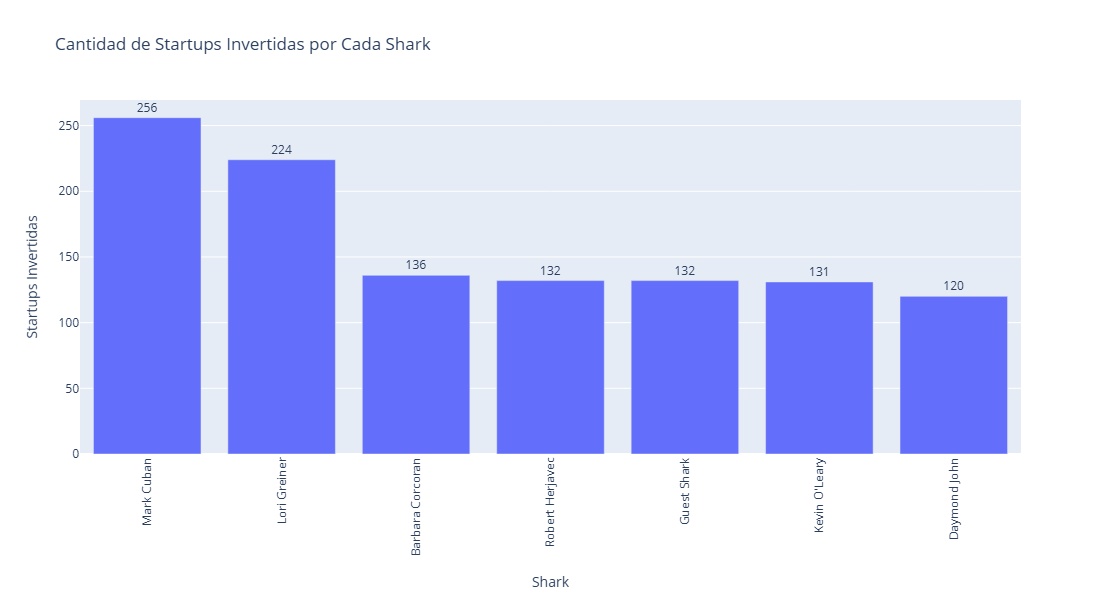

In [28]:
# Columnas de inversión por shark
shark_columns = {
    'Barbara Corcoran': 'Barbara Corcoran Investment Amount',
    'Mark Cuban': 'Mark Cuban Investment Amount',
    'Lori Greiner': 'Lori Greiner Investment Amount',
    'Robert Herjavec': 'Robert Herjavec Investment Amount',
    'Daymond John': 'Daymond John Investment Amount',
    "Kevin O'Leary": 'Kevin O Leary Investment Amount',
    'Guest Shark': 'Guest Investment Amount'
}

# Contar cuántas startups distintas recibió inversión de cada shark
shark_startup_counts = {
    shark: (df[col] > 0).sum()
    for shark, col in shark_columns.items()
}

# Convertir a DataFrame y ordenar
startup_df = pd.DataFrame.from_dict(shark_startup_counts, orient='index', columns=['Startups Invertidas'])
startup_df = startup_df.reset_index().rename(columns={'index': 'Shark'})
startup_df = startup_df.sort_values(by='Startups Invertidas', ascending=False)

# Crear gráfico interactivo de barras vertical
fig = px.bar(
    startup_df,
    x='Shark',
    y='Startups Invertidas',
    text='Startups Invertidas',
    title='Cantidad de Startups Invertidas por Cada Shark',
    labels={'Startups Invertidas': 'Startups Invertidas'},
)

fig.update_traces(textposition='outside', hovertemplate='%{x}: %{y} startups')
fig.update_layout(width=900, height=600, xaxis_tickangle=-90)
fig.show()

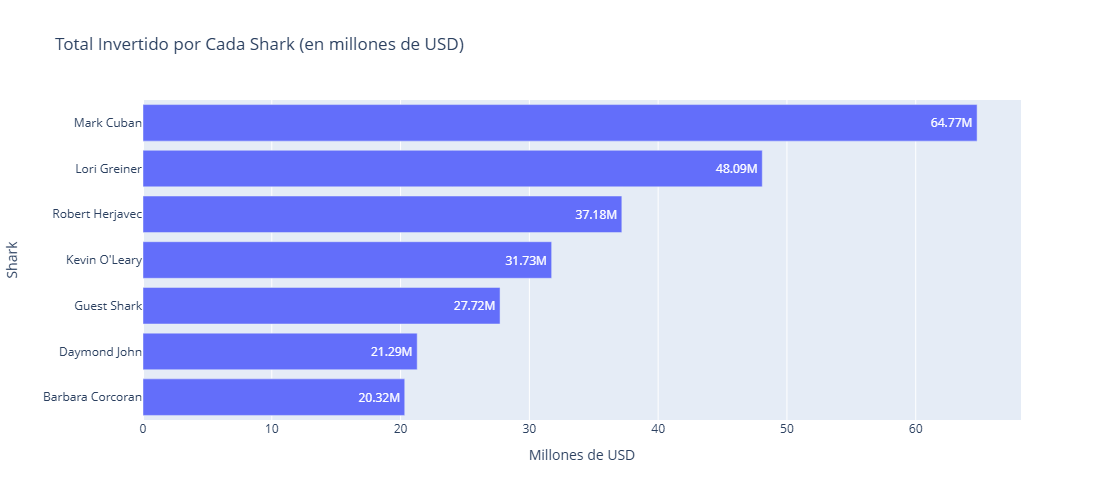

In [40]:
# Lista de columnas con montos invertidos por cada tiburón
shark_columns = [
    'Barbara Corcoran Investment Amount',
    'Mark Cuban Investment Amount',
    'Lori Greiner Investment Amount',
    'Robert Herjavec Investment Amount',
    'Daymond John Investment Amount',
    'Kevin O Leary Investment Amount',
    'Guest Investment Amount'
]

# Sumar el total invertido por cada tiburón
shark_investments = df[shark_columns].sum()

# Formato de los nombres
shark_investments.index = [
    'Barbara Corcoran', 'Mark Cuban', 'Lori Greiner',
    'Robert Herjavec', 'Daymond John', "Kevin O'Leary", 'Guest Shark'
]

# Convertir a DataFrame para Plotly
shark_df = shark_investments.reset_index()
shark_df.columns = ['Shark', 'Total Investment']
shark_df['Millones USD'] = shark_df['Total Investment'] / 1_000_000

# Crear gráfico horizontal interactivo
fig = px.bar(
    shark_df.sort_values('Millones USD'),
    x='Millones USD',
    y='Shark',
    orientation='h',
    text='Millones USD',
    title='Total Invertido por Cada Shark (en millones de USD)',
    labels={'Millones USD': 'Millones de USD'},
)

fig.update_traces(texttemplate='%{text:.2f}M',hovertemplate='%{y}: %{x:.2f} millones de USD')
fig.update_layout(width=900, height=500)
fig.show()

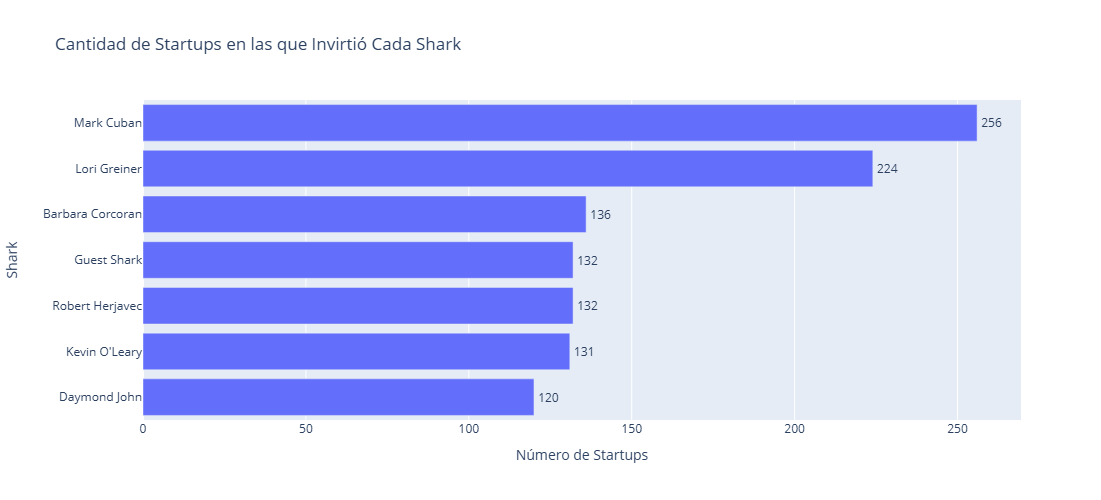

In [34]:
shark_columns = [
    'Barbara Corcoran Investment Amount',
    'Mark Cuban Investment Amount',
    'Lori Greiner Investment Amount',
    'Robert Herjavec Investment Amount',
    'Daymond John Investment Amount',
    'Kevin O Leary Investment Amount',
    'Guest Investment Amount'
]

# Contar en cuántas startups invirtió cada tiburón (donde el monto sea mayor que 0)
shark_deal_counts = (df[shark_columns] > 0).sum()

# Renombrar índices para visualización
shark_deal_counts.index = [
    'Barbara Corcoran', 'Mark Cuban', 'Lori Greiner',
    'Robert Herjavec', 'Daymond John', "Kevin O'Leary", 'Guest Shark'
]

# Convertir a DataFrame para Plotly
deals_df = shark_deal_counts.reset_index()
deals_df.columns = ['Shark', 'Número de Startups']

# Crear gráfico horizontal interactivo
fig = px.bar(
    deals_df.sort_values('Número de Startups'),
    x='Número de Startups',
    y='Shark',
    orientation='h',
    text='Número de Startups',
    title='Cantidad de Startups en las que Invirtió Cada Shark',
)

fig.update_traces(textposition='outside',hovertemplate='%{y}: %{x} startups')
fig.update_layout(width=900, height=500)
fig.show()

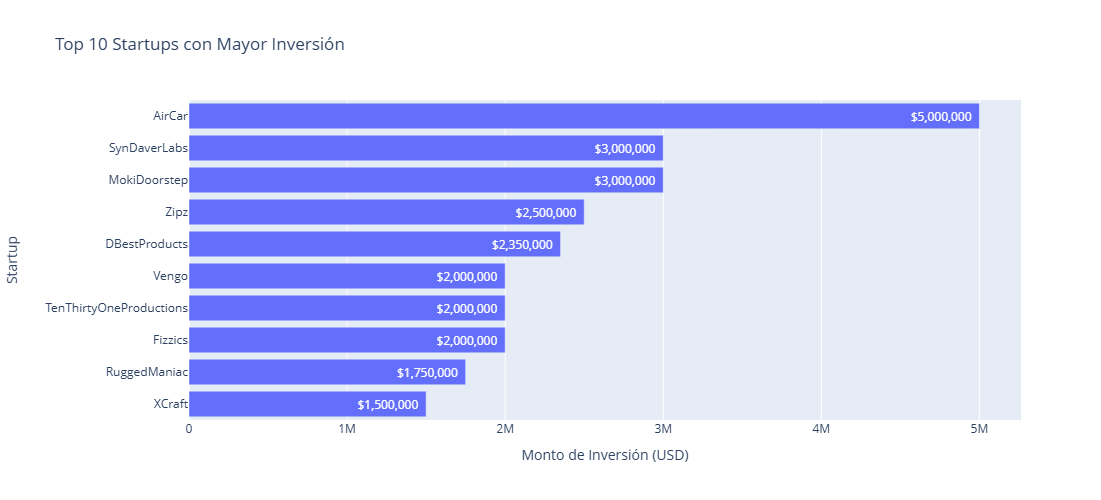

In [ ]:
# Asegurar que los montos sean numéricos
df['Total Deal Amount'] = pd.to_numeric(df['Total Deal Amount'], errors='coerce')

# Eliminar nulos y ordenar por monto
top_startups = df[['Startup Name', 'Total Deal Amount']].dropna().sort_values(
    by='Total Deal Amount', ascending=False).head(10)

fig = px.bar(
    top_startups.sort_values('Total Deal Amount'),
    x='Total Deal Amount',
    y='Startup Name',
    orientation='h',
    text='Total Deal Amount',
    title='Top 10 Startups con Mayor Inversión',
    labels={'Total Deal Amount': 'Monto de Inversión (USD)', 'Startup Name': 'Startup'},
)

fig.update_traces(texttemplate='$%{text:,.0f}',hovertemplate='%{y}: $%{x:,.0f}')
fig.update_layout(width=900, height=500)
fig.show()